In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import PartialDependenceDisplay

Cargar y limpiar datos

In [2]:
housing = pd.read_csv('housing.csv')
housing = pd.get_dummies(housing, drop_first=True)
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean())
target = 'median_house_value'
X = housing.copy().drop(target, axis=1)
y = housing[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [3]:
# Ejempolo gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=4)

model.fit(X_train, y_train)
predicciones = model.predict(X_test)
r2_score(y_test, predicciones)

0.8199684739230407

In [5]:
## Cross validation 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('gbt', GradientBoostingRegressor(n_estimators=300))
])

params = {
    'gbt__max_depth': [2, 3, 4, 5],
    'gbt__learning_rate': [0.01, 0.1, 0.5],    
}

grid_gbt = GridSearchCV(estimator=pipeline, n_jobs=-1, param_grid=params, cv=5, scoring='r2').fit(X_train, y_train)

grid_gbt.best_estimator_.named_steps['gbt']

In [6]:
# Mejor estimador
grid_gbt.best_params_

{'gbt__learning_rate': 0.1, 'gbt__max_depth': 5}

In [7]:
# r2 score
best_model = grid_gbt.best_estimator_.named_steps['gbt']

predicciones = best_model.predict(X_test)
r2_score(y_test, predicciones)

0.8291842581760024

In [5]:
## Calibracion


In [8]:
# Entendiendo el modelo 
importancia = pd.DataFrame({
    'features': X_train.columns,
    'importance': best_model.feature_importances_
})
importancia.sort_values('importance', ascending=False)

,features,importance
7,median_income,0.527183
8,ocean_proximity_INLAND,0.149394
0,longitude,0.101713
1,latitude,0.082621
2,housing_median_age,0.044035
5,population,0.032644
4,total_bedrooms,0.026260
3,total_rooms,0.014700
6,households,0.012402
11,ocean_proximity_NEAR OCEAN,0.007155


    PartialDependenceDisplay.from_estimator(
        best_grid_gbt,
        X_train,
        [i],
        feature_names=X_train.columns
    )

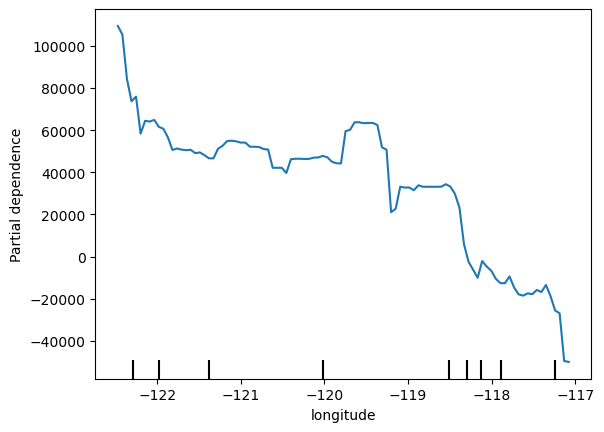

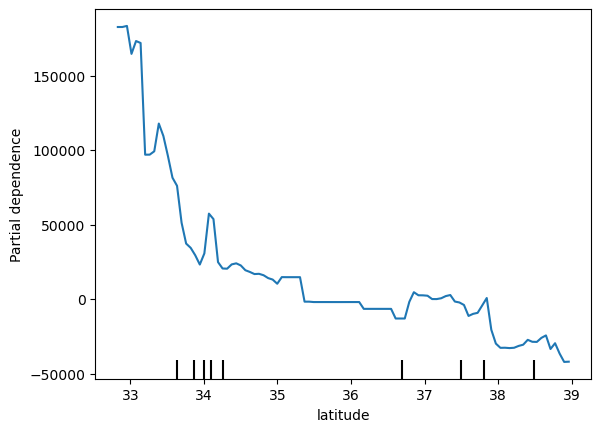

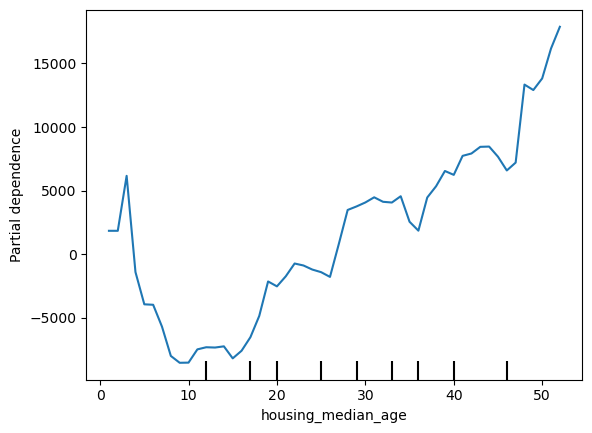

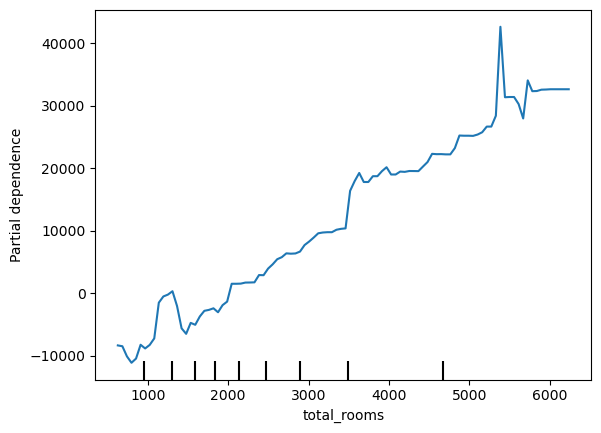

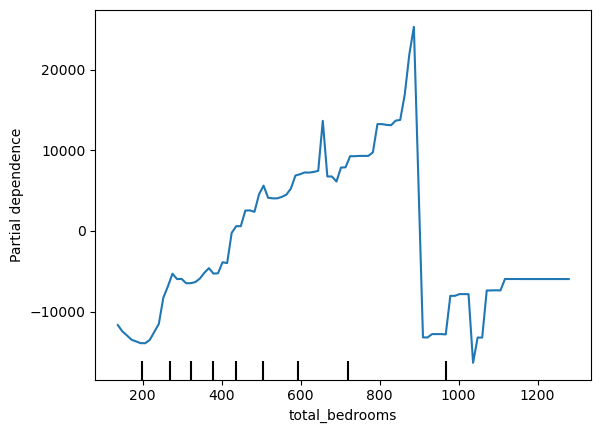

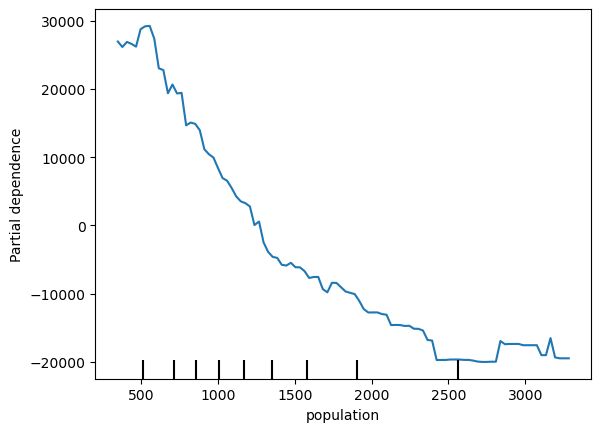

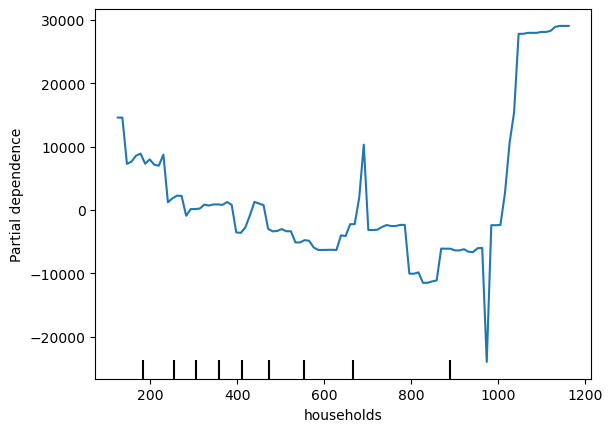

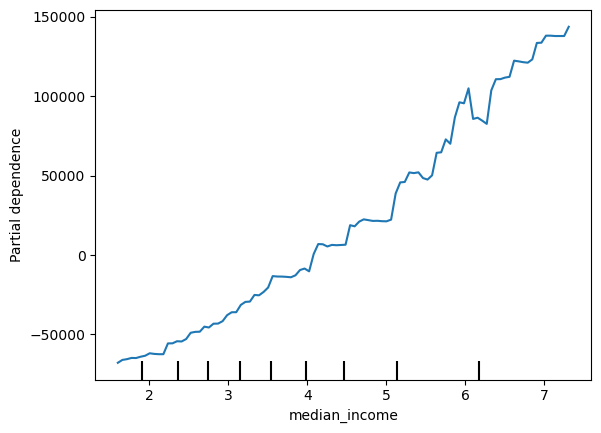

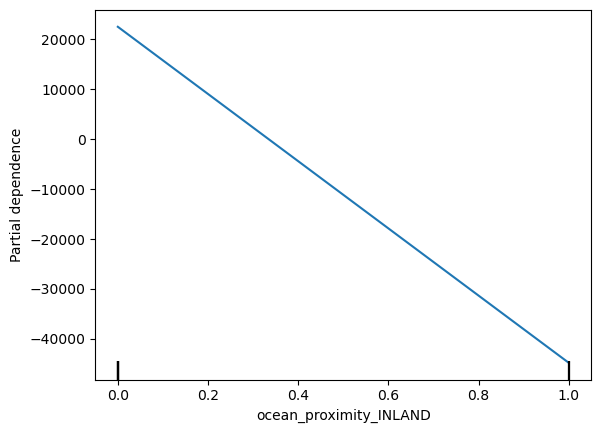

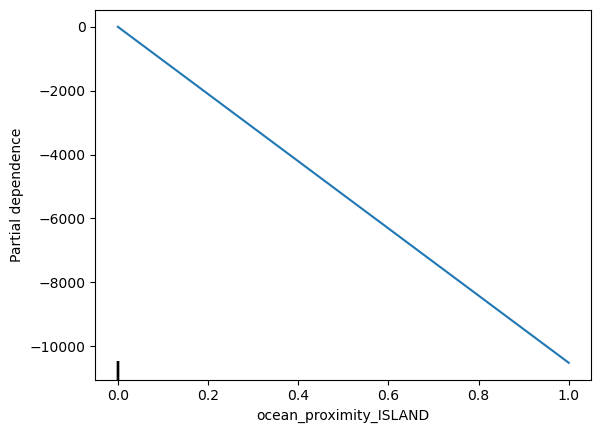

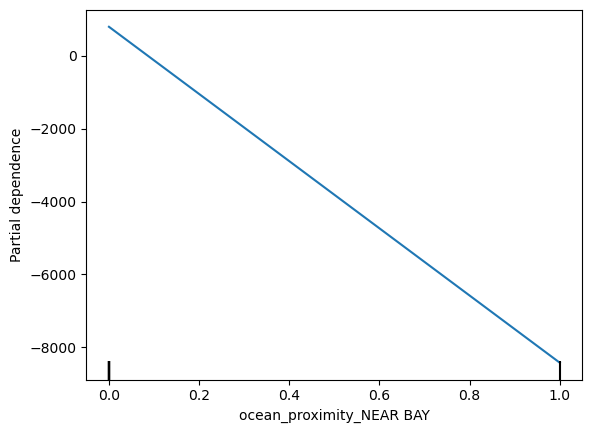

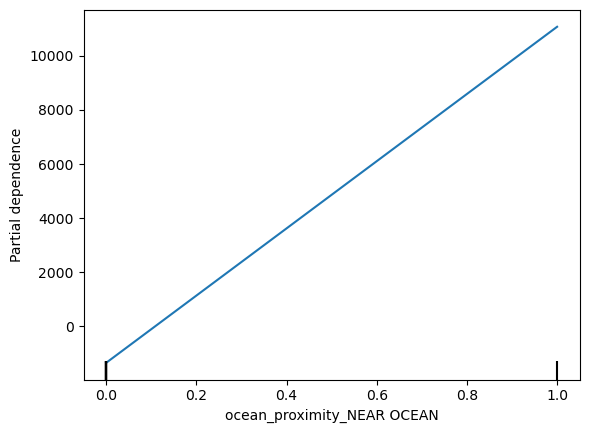

In [11]:
# Codigo for para partial dependence plot 

for i in range(len(X_train.columns)):
    PartialDependenceDisplay.from_estimator(
        best_model, 
        X_train, 
        [i],
        feature_names=X_train.columns
    )
